# Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problem statement: 

Want to know how large $n$ has to be so that the Poisson distribution and Gaussian distribution agree to within a factor of 2 at $5\sigma$ and at $3\sigma$

### Strategy: 

Write the Poisson and Gaussian distributions in terms of the same variables. I'll write it all in terms of $\lambda$, the mean: so for the Gaussian distribution, $\sigma \rightarrow \sqrt{\lambda}$. To agree within a factor of two at $a\sigma$, the following equality should hold:

$$ \frac{P(\lambda + a\sqrt{\lambda})}{G(\lambda + a\sqrt{\lambda})} = 2  $$

Where P is the poisson distribution:

$$ P(x) = \frac{\lambda^x e^{-\lambda}}{x!} $$

And G is the Gaussian distribution:

$$ G(x) = \frac{e^{-\frac{(x-\lambda)^2}{2\lambda}}}{\sqrt{2\pi\lambda}} $$

Now, to make things computationally more simple, we will make Sterling's approximation and take the natural logarithm. So, the equality turns to:

$$ \left(x\ln{\lambda} - \lambda + x - x\ln{x} - \frac{1}{2}\ln{2\pi x}\right) - \left(-\frac{(x-\lambda)^2}{2\lambda} - \frac{1}{2}\ln{2\pi x}\right) = \ln{2} $$

By evaluating LHS of the equation for many values of $\lambda$, an approximation may be found for the $\lambda$ (assuming $n$ is of the order $\lambda$) which gives at least a factor of 2 agreement for the Poisson and Gaussian at $5\sigma$ and $3\sigma$.

Create a function for the ln of the Poisson distribution:

In [99]:
def ln_poisson(x,lam):
    return (x*np.log(lam) - lam + x - x*np.log(x) - 0.5*np.log(2*np.pi*x))

And for the ln of the Gaussian distribution:

In [66]:
def ln_gaussian(x,lam,sigma):
    return (-((x - lam)**2/(2*lam)) - 0.5*np.log(2*np.pi*lam))

1000 Values of $\lambda$ from very close to 0 to 1000, giving approximate integer $\lambda$.

In [74]:
lam = np.linspace(0.1,1000,num=1000)
five_sigma = lam + 5*np.sqrt(lam)
three_sigma = lam + 3*np.sqrt(lam)

Plot a figure to see where the LHS and RHS of the equation intersect

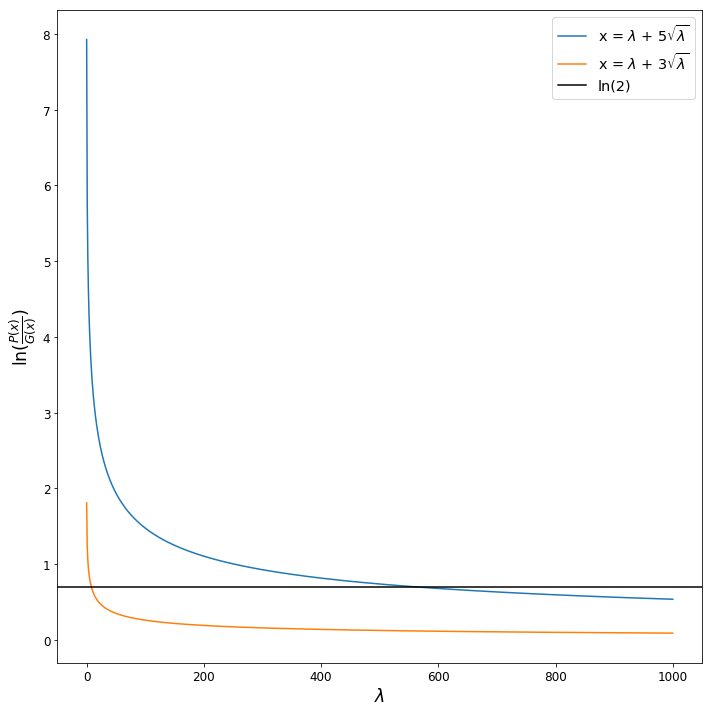

In [82]:
fig = plt.figure(figsize=(10,10))
plt.plot(lam,ln_poisson(five_sigma,lam)-ln_gaussian(five_sigma,lam,np.sqrt(lam)),
         label='x = $\lambda$ + 5$\sqrt{\lambda}$')
plt.plot(lam,ln_poisson(three_sigma,lam)-ln_gaussian(three_sigma,lam,np.sqrt(lam)),
         label='x = $\lambda$ + 3$\sqrt{\lambda}$')
plt.axhline(np.log(2),c='k',label='ln(2)')
plt.legend(fontsize='x-large')
plt.xlabel('$\lambda$',fontsize='xx-large')
plt.ylabel(r'ln($\frac{P(x)}{G(x)}$)',fontsize='xx-large')
plt.tick_params(labelsize='large')
plt.tight_layout()
plt.show()

Find out the value of $\lambda$ where the curves intersect, giving the order $n$ for which the Poisson agrees with the Gaussian to within a factor of 2.

In [98]:
difference_5 = abs(ln_poisson(five_sigma,lam)-ln_gaussian(five_sigma,lam,np.sqrt(lam)) - np.log(2))
idx_min_5 = np.argmin(difference_5)

difference_3 = abs(ln_poisson(three_sigma,lam)-ln_gaussian(three_sigma,lam,np.sqrt(lam)) - np.log(2))
idx_min_3 = np.argmin(difference_3)

print('To agree to a factor of two at 5sigma, require n = %s' % str(int(lam[idx_min_5])+1))
print('To agree to a factor of two at 3sigma, require n = %s' % str(int(lam[idx_min_3])+1))

To agree to a factor of two at 5sigma, require n = 576
To agree to a factor of two at 3sigma, require n = 9


# Problem 5